In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina'
%matplotlib inline


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
all_data = pd.concat((train.loc[:,'Pclass':'Embarked'],
                      test.loc[:,'Pclass':'Embarked']))



Нормализуем числовые признаки, используя np.log1p

Пояснение

np.log1p - натуральный логарифм x + 1

Натуральный логарифм числа x — это показатель степени, в которую нужно возвести число e, чтобы получить x.

Пример натуральный логарифм числа 3 равен 1.09861228867

Если мы теперь число е 2,72 возведем в степень 1.09861228867 мы получим 3.0020832974394


Пример работы np.log1p

import numpy as np

in_array = [1, 10, 100]
print ("Input array : ", in_array)
 
out_array = np.log1p(in_array)
print ("Output array : ", out_array)

Input array :  [1, 10, 100]


Output array :  [ 0.69314718  2.39789527  4.61512052]

Такие данные машина воспринимает лучше 
Если мы возьмем массив Input array и посмотрим на результат Output array 
то мы видим что мы избавились от большого разброса значений


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E604291048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E6037C8DA0>]], dtype=object)

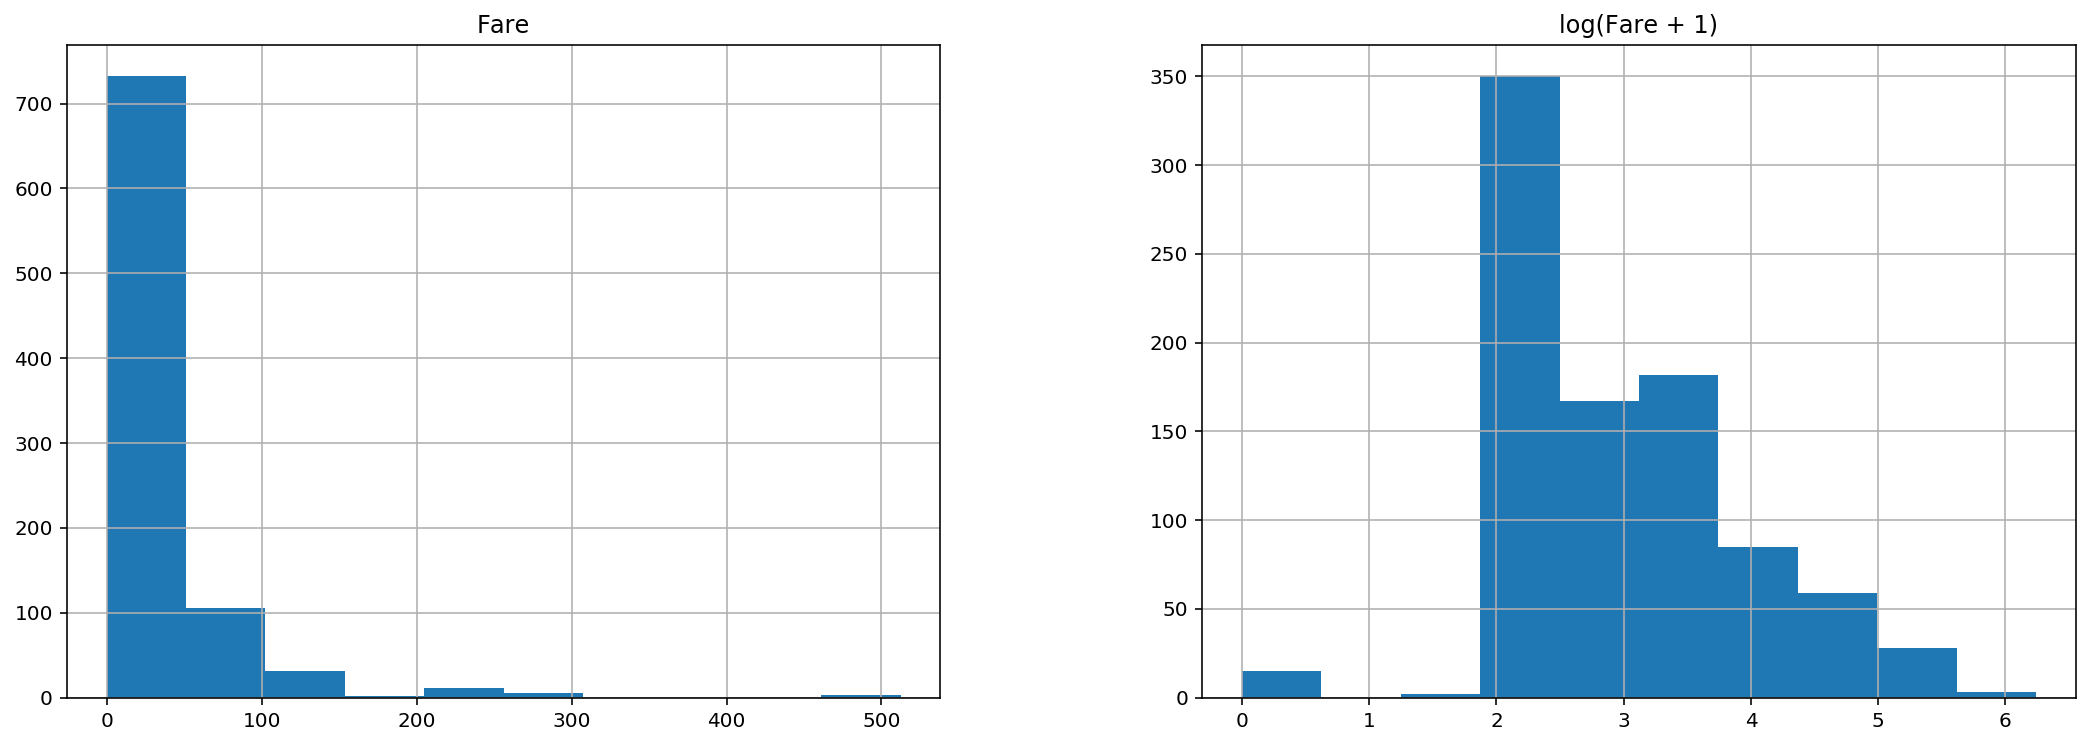

In [41]:
# Визуализация данных колонки Fare (стоимость проезда) с и без np.log1p (нормализации)

matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
prices = pd.DataFrame({"Fare":train["Fare"], "log(Fare + 1)":np.log1p(train["Fare"])})
prices.hist()

In [42]:
# получаем индексы цифровых столбцов
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# применяем np.log1p к цифровым признакам, которы имеют сильную ассиметрию (skewed_feats> 0.75)
# Для справки cимметричный набор данных будет иметь асимметрию, равную 0
# метод skew возвращает ассиметрию 
# NaN данные отбрасываем
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])




In [43]:
# метод get_dummies позволяет не преобразовывать номинальные значения вручную 
# метод создает отдельную колонку для каждого возможного значения
# пример
# Колонка мужчина есть 1 нет 0
# Колонка женщина есть 1 нет 0
# Это очень удобно
#Вместо преобразования значений по словарю
#Dictionary={'male':0,'female':1}
#Xtrain['Sex']=Xtrain['Sex'].apply(lambda x:Dictionary[x])

all_data = pd.get_dummies(all_data)


In [44]:
# Заменяем Nan средним значением
all_data = all_data.fillna(all_data.mean())

In [49]:
# Разбиваем данные на тренировочную и тестовую выборку
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Survived



In [46]:
# Лес
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y)
random_forest_preds = random_forest.predict(X_test)
random_forest.score(X_train, y)
accuracy = round(random_forest.score(X_train, y) * 100, 2)
print(accuracy)

99.89


In [47]:
#Запись
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived":random_forest_preds})
solution.to_csv("solution.csv", index = False)

In [11]:
Data536 = pd.read_csv('solution.csv')
Data536.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
